<a href="https://colab.research.google.com/github/Sreenu7702/stock-market-analysis-project/blob/main/real_time_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
pip install pandas matplotlib yfinance


In [65]:
#STEP 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

print("All libraries imported successfully!")


All libraries imported successfully!


In [43]:
#STEP 2: Download Stock Market Data
#We’ll take TCS example (you can change stock name).
stock_symbol = "TCS.NS"   # NSE stock
data = yf.download(stock_symbol, start="2023-01-01", end="2024-01-01")

print(data.head())


/tmp/ipython-input-3274045985.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2023-01-02  2986.108887  2991.053137  2962.074988  2985.696922   709547
2023-01-03  3031.796143  3039.715795  2971.322234  2977.456555  1245178
2023-01-04  3034.817871  3046.445880  3008.769745  3027.539077  1231668
2023-01-05  3031.567627  3055.555704  3004.878419  3049.055017  1826057
2023-01-06  2940.421631  3022.823568  2929.846671  3021.404379  2488376


In [44]:
#STEP 3: Understand the Dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.NS)   245 non-null    float64
 1   (High, TCS.NS)    245 non-null    float64
 2   (Low, TCS.NS)     245 non-null    float64
 3   (Open, TCS.NS)    245 non-null    float64
 4   (Volume, TCS.NS)  245 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.5 KB
None
Price         Close         High          Low         Open        Volume
Ticker       TCS.NS       TCS.NS       TCS.NS       TCS.NS        TCS.NS
count    245.000000   245.000000   245.000000   245.000000  2.450000e+02
mean    3190.786155  3214.439810  3165.354697  3189.956413  1.933396e+06
std      163.496176   164.802612   160.510354   160.311053  9.985615e+05
min     2893.066406  2914.977412  2874.946843  2893.440477  7.095470e+05
25%     3052.854736  3076.650030  3032.029836  3053.91

In [45]:
#STEP 4: Clean the Data (if needed)
data.isnull().sum()


,,0
Price,Ticker,
Close,TCS.NS,0
High,TCS.NS,0
Low,TCS.NS,0
Open,TCS.NS,0
Volume,TCS.NS,0


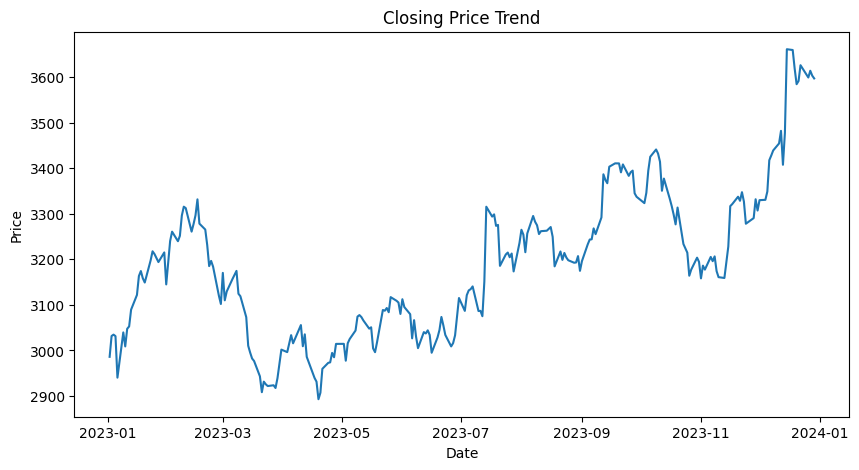

In [46]:
#STEP 5: Analyze Closing Price Trend
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [47]:
#STEP 6: Calculate Daily Returns
data['Daily Return'] = data['Close'].pct_change()

print(data[['Close', 'Daily Return']].head())


Price             Close Daily Return
Ticker           TCS.NS             
Date                                
2023-01-02  2986.108887          NaN
2023-01-03  3031.796143     0.015300
2023-01-04  3034.817871     0.000997
2023-01-05  3031.567627    -0.001071
2023-01-06  2940.421631    -0.030066


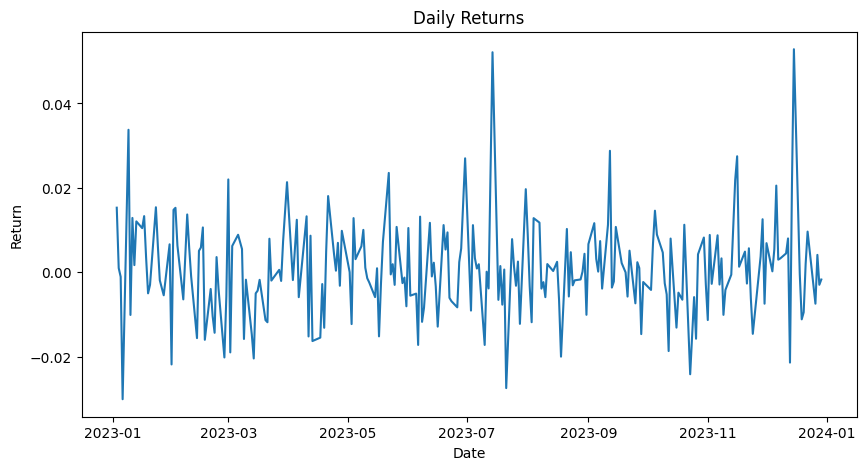

In [48]:
#STEP 7: Plot Daily Returns
plt.figure(figsize=(10,5))
plt.plot(data['Daily Return'])
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()


In [49]:
#STEP 8: Moving Average Analysis
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()


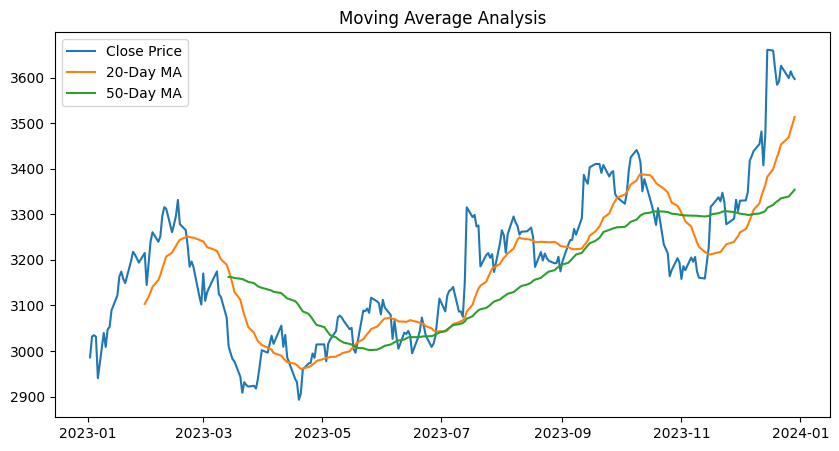

In [50]:
#STEP 9: Plot Moving Averages
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA_20'], label='20-Day MA')
plt.plot(data['MA_50'], label='50-Day MA')
plt.legend()
plt.title("Moving Average Analysis")
plt.show()


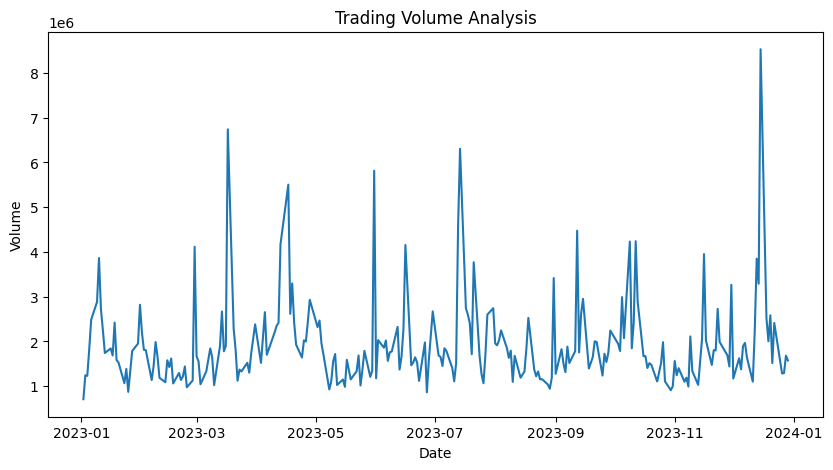

In [51]:
#STEP 10: Volume Analysis
plt.figure(figsize=(10,5))
plt.plot(data['Volume'])
plt.title("Trading Volume Analysis")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()



In [52]:
#STEP 11: Final Insights (Print)
print("Highest Closing Price:", data['Close'].max())
print("Lowest Closing Price:", data['Close'].min())
print("Average Closing Price:", data['Close'].mean())


Highest Closing Price: Ticker
TCS.NS    3661.204346
dtype: float64
Lowest Closing Price: Ticker
TCS.NS    2893.066406
dtype: float64
Average Closing Price: Ticker
TCS.NS    3190.786155
dtype: float64


In [53]:
#STEP 13: Get Latest (Daily) Stock Data
stock_symbol = "TCS.NS"

data = yf.download(stock_symbol, period="6mo")  # last 6 months
data = data.dropna()

print(data.tail())


/tmp/ipython-input-3814256605.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period="6mo")  # last 6 months
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2025-12-22  3324.899902  3328.600098  3291.000000  3310.000000  2632816
2025-12-23  3310.000000  3319.899902  3293.500000  3319.899902  2365420
2025-12-24  3319.000000  3327.100098  3296.100098  3304.100098  1367708
2025-12-26  3280.000000  3320.000000  3271.800049  3313.100098  1176664
2025-12-29  3251.500000  3288.000000  3242.899902  3280.000000  2079253


In [54]:
#STEP 14: Calculate Daily Price Change
data = yf.download("TCS.NS", period="6mo")
data.columns = data.columns.get_level_values(0)

data['Price Change'] = data['Close'] - data['Open']
data['% Change'] = (data['Price Change'] / data['Open']) * 100



/tmp/ipython-input-1523194938.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TCS.NS", period="6mo")
[*********************100%***********************]  1 of 1 completed


In [55]:
#STEP 15: Identify Bullish / Bearish Day
data['Trend'] = data['Price Change'].apply(
    lambda x: 'Bullish' if x > 0 else 'Bearish'
)

print(data[['Close', 'Price Change', 'Trend']].tail())

Price             Close  Price Change    Trend
Date                                          
2025-12-22  3324.899902     14.899902  Bullish
2025-12-23  3310.000000     -9.899902  Bearish
2025-12-24  3319.000000     14.899902  Bullish
2025-12-26  3280.000000    -33.100098  Bearish
2025-12-29  3251.500000    -28.500000  Bearish


In [56]:
#STEP 16: Daily Volume Analysis
data['Volume Change'] = data['Volume'].pct_change() * 100

print(data[['Volume', 'Volume Change']].tail())


Price        Volume  Volume Change
Date                              
2025-12-22  2632816     -32.535334
2025-12-23  2365420     -10.156274
2025-12-24  1367708     -42.179063
2025-12-26  1176664     -13.968186
2025-12-29  2079253      76.707454


In [57]:
#STEP 17: Daily Moving Average Signal
data['MA_10'] = data['Close'].rolling(10).mean()
data['MA_20'] = data['Close'].rolling(20).mean()


In [58]:
#STEP 18: Generate Buy / Sell / Hold Signal
def signal(row):
    if row['MA_10'] > row['MA_20']:
        return 'Buy'
    elif row['MA_10'] < row['MA_20']:
        return 'Sell'
    else:
        return 'Hold'

data['Signal'] = data.apply(signal, axis=1)

print(data[['Close', 'MA_10', 'MA_20', 'Signal']].tail())


Price             Close        MA_10        MA_20 Signal
Date                                                    
2025-12-22  3324.899902  3235.069995  3202.994983    Buy
2025-12-23  3310.000000  3245.239990  3212.534985    Buy
2025-12-24  3319.000000  3258.219995  3220.339990    Buy
2025-12-26  3280.000000  3267.030005  3227.509985    Buy
2025-12-29  3251.500000  3270.130005  3233.209985    Buy


In [59]:
#STEP 19: TODAY’s Stock Analysis (Important)
import matplotlib.pyplot as plt
import pandas as pd

def stock_analysis_with_graph(data, date):
    date = pd.to_datetime(date)

    if date not in data.index:
        print("❌ No stock data available for this date")
        return

    row = data.loc[date]

    # ---------- TEXT ANALYSIS ----------
    print("📅 Date:", date.date())
    print("Open:", row['Open'])
    print("Close:", row['Close'])
    print("High:", row['High'])
    print("Low:", row['Low'])
    print("Volume:", row['Volume'])
    print("Price Change:", round(row['Close'] - row['Open'], 2))
    print("Percentage Change:", round(((row['Close'] - row['Open']) / row['Open']) * 100, 2), "%")

    # ---------- GRAPH 1: OHLC PRICE ----------
    prices = ['Open', 'High', 'Low', 'Close']
    values = [row['Open'], row['High'], row['Low'], row['Close']]

    plt.figure(figsize=(6,4))
    plt.bar(prices, values)
    plt.title(f"OHLC Prices on {date.date()}")
    plt.ylabel("Price")
    plt.show()

    # ---------- GRAPH 2: VOLUME ----------
    plt.figure(figsize=(4,4))
    plt.bar(['Volume'], [row['Volume']])
    plt.title(f"Volume on {date.date()}")
    plt.ylabel("Volume")
    plt.show()


Enter date (YYYY-MM-DD): 2025-12-15
📅 Date: 2025-12-15
Open: 3211.10009765625
Close: 3230.199951171875
High: 3238.199951171875
Low: 3197.300048828125
Volume: 1562190
Price Change: 19.1
Percentage Change: 0.59 %


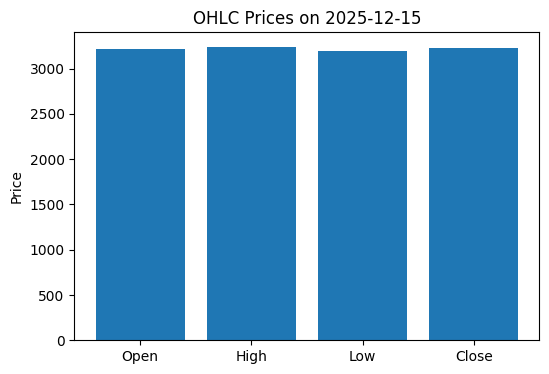

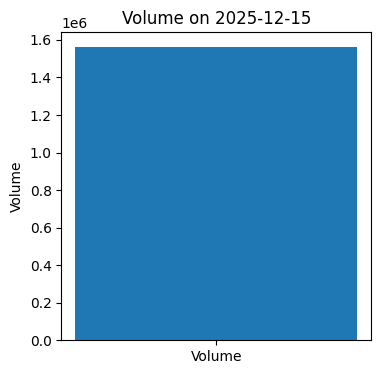

In [60]:
#STEP 20: Daily Analysis Visualization
user_date = input("Enter date (YYYY-MM-DD): ")
stock_analysis_with_graph(data, user_date)
